# Chaotic Systems

In this notebook we will practice several general scientific computing skills: working with numpy arrays, working with the scipy package `solve_ivp`, and some useful plotting practice, including with 3D plots. This will mostly close out our in-class exploration of ODEs, although we will revisit and build on certain concepts. The final problem asks you to think about how you would put together several methods we have discussed in order to solve a boundary-value ODE problem.  

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Feigenbaum plots and the onset of chaos

The logistic map is a famous example of how chaotic behavior can arise from a very simple nonlinear equation. Consider the following equation:

$$x_{n+1} = r x_n (1 - x_n)$$

where $x$ is a number between 0 and 1. As simple as the logistic map is, it displays some interesting behavior. Let's explore it!

&#128309; Write a simple function `logistic_map` that computes the above for a given `x` and `r`.

In [8]:
def logistic_map(x, r):
    return r*x*(1-x)

When we iteratively apply this equation to x, one of three things happens:

1. The value settles down to a fixed number and stays there. This is called a **fixed point**. 
2. x doesn't settle down to a single value, but settles into a periodic pattern, repeating the same few values over and over. This is called a **limit cycle**.  
3. The value exhibits **deterministic chaos**, generating a seemingly random sequence of numbers. 

&#128309; Initialize x to 0.5 and compute 100 iterations of x with r=2.5. Repeat this procedure for r=3.5 and r=3.8. Plot x as a function of iteration number for each value of r (choosing a different color for each r). Decide which r value exhibits which of the behaviors above, and clearly label your plot.  

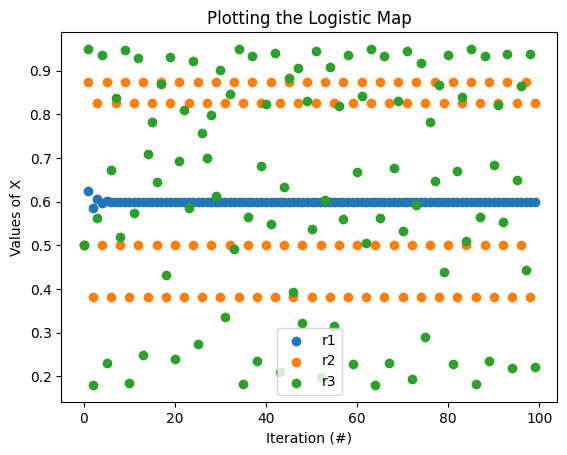

In [9]:
# initialize parameters
x1, x2, x3 = 0.5, 0.5, 0.5
r1, r2, r3 = 2.5, 3.5, 3.8
results1, results2, results3 = [], [], []
iteration = np.arange(0, 100)

for _ in range(len(iteration)):
    # append output to results list
    results1.append(x1)
    results2.append(x2)
    results3.append(x3)

    x1 = logistic_map(x1, r1)
    x2 = logistic_map(x2, r2)
    x3 = logistic_map(x3, r3)

# plot functions
plt.scatter(iteration, results1, label = "r1")
plt.scatter(iteration, results2, label = "r2")
plt.scatter(iteration, results3, label = "r3")

# graph axis
plt.title("Plotting the Logistic Map")
plt.xlabel("Iteration (#)")
plt.ylabel("Values of X")
plt.legend()
plt.show()

&#128309; Now we will make a Feigenbaum plot: a plot of the behavior of x as a function of the parameter r. Do the following:

For a given value of r:
1. Initialize x to 0.5
2. Iterate x 50 times and discard the output. That will give x a chance to settle down into a fixed point or a limit cycle if it is going to.
3. Iterate x 1000 more times and store the output for plotting.

Repeat this procedure for 100 values of r between 0 and 4, and make a plot with r on the x-axis and your 1000 values of x on the y-axis. *Tip:* think about and plan out how you will do this before you start. 

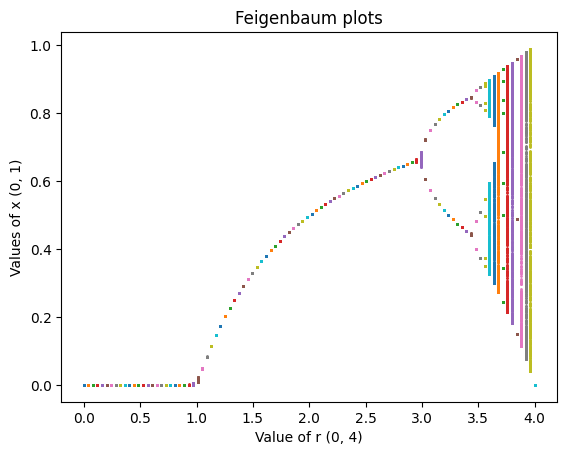

In [10]:
def mapping(r):
    # initialize variables
    iteration = np.arange(1050)
    x = 0.5
    results = []

    # loop through every iteration and update x value
    for i in range(len(iteration)):
        x = logistic_map(x, r)

        # cutoff everything below 50 iterations
        if i < 50: 
            continue

        results.append(x)

    return results

# plot values for 100 values of r between 0 and 4
for r in np.linspace(0, 4, 100):
    plt.scatter(np.zeros(1000) + r, mapping(r), label=r, s=1)

# graph axis
plt.title("Feigenbaum plots")
plt.xlabel("Value of r (0, 4)")
plt.ylabel("Values of x (0, 1)")
plt.show()

&#128310; Describe in your own words what the plot shows. Where are the fixed points? The limit cycles? Explain what you observe for the r values that exhibit deterministic chaos. 

The plot shows the value of $x$ and the behavior depends strongly on $r$. For values of $r$ between 0 and 3, we have fixed points. For the value 3 and approx 3.5 and likely more narrow points, we have deterministic chaos. Finally the limited cycles occur for values of $r$ above the minimum deterministic chaos point, 3. For the values of $r$ that exhibit deterministic chaos, we see that they have wider bands than the points near them, indicating they fluctuate for longer in a larger range than values of $r$ slightly larger and smaller. 

We also should recognize that the main value of $r$, 3, is located primarily at what appears to be 0.66, which likely non-coincidentally is $\frac{2}{3}$.

&#128310; The point in parameter space where the behavior transitions from orderly (fixed points or limit cycles) to chaotic behavior is often called the *onset of chaos*. Based on your plot, where is the onset of chaos for this logistic map? 

The onset of chaos in this plot is (3, 0.66).

## The Lorenz Equations

Consider the following system of differential equations:

$$\frac{dx}{dt} = \sigma (y - x)$$
$$\frac{dy}{dt} = \rho x - y - xz$$
$$\frac{dz}{dt} = xy - \beta z$$

where $\sigma$, $\rho$, and $\beta$ are constants. These equations were used by Edward Lorenz, Ellen Fetter, and Margaret Hamilton to study atmospheric convection. 

&#128309; Write a function `lorenz` that takes positional arguments `t` and `xvec`, along with keyword arguments `sigma`, `beta`, and `rho`. `xvec` should be a length-3 array, and the program should return $\left[\frac{dx}{dt}, \frac{dy}{dt}, \frac{dz}{dt}\right]$ as a length-3 array.

In [11]:
def lorenz (t, xvec, sigma, beta, rho):
    dx_dt = sigma*(xvec[1] - xvec[0])
    dy_dt = rho*xvec[0] - xvec[1] - xvec[0]*xvec[2]
    dz_dt = xvec[0]*xvec[1] - beta*xvec[2]
    
    return np.array([dx_dt, dy_dt, dz_dt])

&#128310; Look up the documentation for the scipy function `solve_ivp`. What numerical integration scheme does it use by default?

By default solve_ivp uses RK45, the range-kutta method that we learned about two weeks ago. 

&#128309; Use the scipy function `solve_ivp` to solve the Lorenz equations with $\sigma=10$, $\beta=8/3$, and $\rho = 28$ from $t = 0$ to $t = 50$ with initial conditions $(x, y, z) = (0, 1, 0)$. Store the output as an object `soln`. 

In [42]:
soln = solve_ivp(lorenz, (0, 50), [0, 1, 0], args=(10, 8/3, 28), rtol=1e-9)

&#128309; Establish a 3D plot using `ax = plt.figure().add_subplot(projection='3d')` and plot x vs y vs z. You should see an example of the famous "Lorenz attractor", which resembles a butterfly. If the curves on your plot are not smooth, look back at the `solve_ivp` documentation and rerun your code with a different choice of `rtol`. 

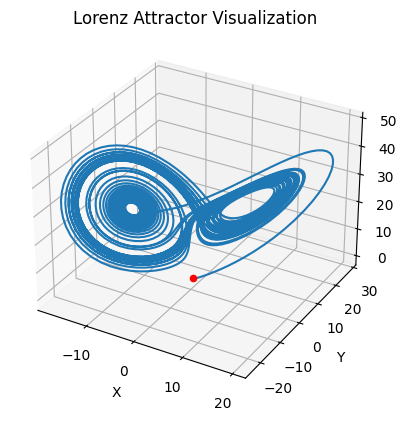

In [47]:
# plot in 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# specify x, y, z by every time step
x, y, z = soln.y[0], soln.y[1], soln.y[2]

# Plot
ax.plot(x, y, z)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# add starting point
ax.scatter(0, 1, 0, color='red')

ax.set_title("Lorenz Attractor Visualization")

plt.show()

&#128309; Vary your initial conditions just a small amount and solve the initial value problem again. Plot both paths on the same plot, using the `alpha` keyword to set the opacity of each line. 

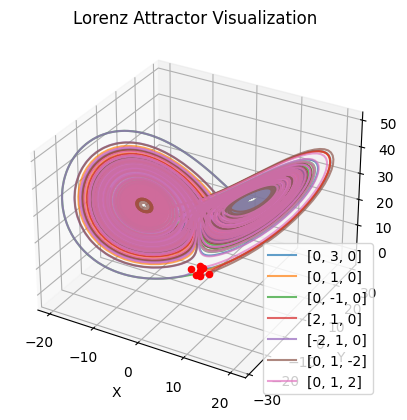

In [57]:
# plot in 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# set initial conditions to test
initial_conditions = [[0, 3, 0], [0, 1, 0], [0, -1, 0], [2, 1, 0], [-2, 1, 0], [0, 1, -2], [0, 1, 2]]

for condition in initial_conditions: # consider every starting condition
    # solve ivp
    soln = solve_ivp(lorenz, (0, 50), condition, args=(10, 8/3, 28), rtol=1e-9)

    # specify x, y, z by every time step
    x, y, z = soln.y[0], soln.y[1], soln.y[2]

    # Plot
    ax.plot(x, y, z, label=str(condition), alpha=0.7) # solution
    ax.scatter(condition[0], condition[1], condition[2], color='red') # starting point

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.legend()
ax.set_title("Lorenz Attractor Visualization")

plt.show()

&#128310; Describe in your own words what the plot shows. In what way does this system exhibit chaos?

The system exhibited chaos, not going in the "correct" or common directly when considering starting points at [-2, 1, 0] and [0, -1, 0]. These two values ended up at a different final location, or found a different stability point than the rest of the initial values. This indicates that negative x or y values might cause destability in the solution. However, I do recognize that no matter the initial condition, it does appear that the Lorenz Attractor always converged upon a singular final solution. 

## Boundary Value Problems: Putting the Pieces Together

We have now solved a number of different ODEs in this class, starting with simple first-order differential equations and working our way up to second-order ODEs and coupled systems of nonlinear ODEs. We have explored a number of numerical techniques for solving ODE problems. However there is one thing that all of the problems we've tackled thus far have in common: they are all **initial value problems**, i.e., we are given the state of the system at some time, and evolving the system forward in time from there. 

Of course there is another type of ODE problem, a **boundary value problem**, or BVP. Say for example we throw a ball up into the air:

$$\frac{d^2 y}{dt^2} = -g$$

where $g$ is the acceleration due to gravity and there is no air resistance. To solve this we need two conditions, e.g. the starting height and velocity of the ball at time 0 (an IVP) or the height of the ball at two starting and ending times. For example, suppose we were told that the ball has height $x=0$ at $t=0$ and it reaches $x=0$ again at time $t=10$ seconds. What was the ball's initial velocity?

### The Shooting Method

The shooting method is a trial-and-error method that searches for the correct initial conditions in order to satisfy the boundary conditions. The idea for the ball example would be to guess an initial upward velocity, solve the differential equation until time $t = 10$ seconds, and then ask whether the ball had reached height 0 (i.e., see if we guessed right). We probably didn't -- we probably overshot or undershot, in which case we should modify our initial velocity guess and try again. 

&#128310; This process, of guessing and checking, can be thought of as a root-finding problem. Think about that and describe in your own words in what sense this step is like root-finding. 

This is similar to a root finding problem in that if we consider the difference of our solution and the optimal solution, we might be above or below at most times, but only at the root (difference = 0) do we actually find the solution parameter. Hence we can use root finding mechanisms to find the value of the input parameter that makes our function 0. 

&#128310; Write pseudocode to sketch out how you would combine Runge-Kutta and a root-finding method to solve the ball problem. Recall that pseudocode is not actual code, but a plan for what your code will do: e.g. instead of `for i in range(nsteps)` you might write `step through time`. 

define ODE
1.   break down d^2 x/ dt^2 into dydt and dvdt
2.   set dvdt = -9.81
3.   update after coding: return both dydt and dvdt

define range kutta method, same as in adaptiveRK notebook.
update after coding for a bit: return  both update on height and velocity

solve for height at given time with range kutta method
1.    start at defined initial condition
2.    step in time, updating with rk4step every timestep

do bisection method with intial condition
1.    same as in root finding notebook. use min and max guess and update based on over or under estimate.

print results of bisection method. 
    

&#128309; See if you can put the pieces together to use Runge-Kutta integration and root-finding to solve the ball problem. Your final answer should be a required initial velocity in $m/s$. 

In [71]:
def free_fall_ode(t, y, v):
    # break down second derivative into dv/dt and dy/dt
    dydt = v
    dvdt = -9.81  # g = 9.81
    return dydt, dvdt

def rk4_step(t, y, v, dt):
    # step in range kutta integration
    f1y, f1v = free_fall_ode(t, y, v)
    f2y, f2v = free_fall_ode(t + dt/2, y + dt/2 * f1y, v + dt/2 * f1v)
    f3y, f3v = free_fall_ode(t + dt/2, y + dt/2 * f2y, v + dt/2 * f2v)
    f4y, f4v = free_fall_ode(t + dt, y + dt * f3y, v + dt * f3v)
    
    y_update = y + dt/6 * (f1y + 2*f2y + 2*f3y + f4y)
    v_update = v + dt/6 * (f1v + 2*f2v + 2*f3v + f4v)
    
    return y_update, v_update

def height_at_time(t, initial_conditions, dt):
    # input boundary conditions
    y = initial_conditions[0]
    v = initial_conditions[1]
    
    while t > 0: # loop until we hit ground

        # update time, position and velocity
        y, v = rk4_step(t, y, v, dt)
        t -= dt
        
    return y

def bisection_method(target, initial_conditions, dt, target_accuracy=1e-5):
    # bisection method around boundary conditions defined earlier
    a, b = initial_conditions[1], 100  # initialize velocity guess, min guess velocity and max guess (m/s)
    
    for _ in range(1000):
        v_guess = (a + b) / 2 # avg of min and max guess
        y_final = height_at_time(10, [0, v_guess], dt)
        
        if np.abs(y_final - target) < target_accuracy: # stop if close
            return v_guess
        
        if y_final < target: # underestimate
            a = v_guess
        else: # overestimate
            b = v_guess

def solve_ball_problem():
    initial_conditions = [0, 0]  # initial h and velocity (m, m/s)
    target_height = 0  # height at t = 10
    dt = 0.01
    
    initial_velocity_sol = bisection_method(target_height, initial_conditions, dt)
    
    print("Initial Velocity Solution:", initial_velocity_sol, "m/s")

# Call the main function
solve_ball_problem()


Initial Velocity Solution: 49.09905046224594 m/s


## Acknowledgments

S.E. Clark 2024, with problems adapted from Newman 2013.